## M/M/1 Queue Simulation Problem

The M/M/1 queue is a classic model in queueing theory, representing a system with a single server and customers arriving and being served in a first-come, first-served manner. Both the arrival and service processes are assumed to follow an exponential distribution.

### Problem Definition

In this simulation, we aim to understand the behavior of an M/M/1 queue under different service rates and to estimate the expected waiting time for customers.

#### Parameters

- **Service Rate** ($\mu$): The rate at which the service station can service customers. This can be a scalar or a vector, indicating the service rate at each design point.
- **Arrival Rate** ($\lambda$): The rate at which customers arrive at the service station. This is a constant value across the simulation.
- **Number of Replications** ($n$): The number of simulations (or replications) to run at each design point.
- **Run Length**: The number of customers simulated in each replication, determining the length of each queue simulation.
- **Initialization Method**: The method used to initialize the simulation. Options include 'stationary', 'mean', and 'zero'.

### Objectives

1. **Estimate Mean Waiting Time**: Compute the average waiting time of customers at each design point, averaged over all replications.
2. **Estimate Variance in Waiting Time**: Calculate the variance in waiting times at each design point to understand the system's variability.

### Equations

The expected steady-state waiting time in an M/M/1 queue is given by:

$$ W = \frac{\lambda}{\mu(\mu - \lambda)} $$

Where:
- $W$: Expected waiting time
- $\lambda$: Arrival rate
- $\mu$: Service rate

This equation is used to calculate the theoretical mean waiting time at each design point for comparison with simulated results.


In [20]:
import numpy as np

# Configuration parameters
maxx = 2.0
minx = 1.1
arrival_rate = 1.0
K = 1000  # Number of prediction points
k = 10    # Number of design points
runlength = 3000
C = 960   # Total computation budget
q = 0     # Degree of polynomial to fit in regression part (default)

# Generate evenly distributed design and prediction points
X = np.linspace(minx, maxx, k) # Design points
XK = np.linspace(minx, maxx, K) # Prediction points

# Analytic values at design and prediction points
truek = arrival_rate / (X * (X - arrival_rate))
true = arrival_rate / (XK * (XK - arrival_rate))

# Effort allocation is proportional to standard deviation
rho = 1.0 / X
ratio = np.sqrt(4 * rho / (1 - rho) ** 4)
n = np.ceil(C * ratio / np.sum(ratio)).astype(int)  # Replications at each design point

# Basis function matrix
B = X ** np.arange(q + 1)
BK = XK ** np.arange(q + 1)

In [21]:
from mm1_sim import MM1sim

Y, Vhat = MM1sim(X, arrival_rate, n, runlength, 'stationary')

In [22]:
Y, Vhat, X

(array([8.83768225, 4.15744681, 2.6042093 , 1.8323904 , 1.33610043,
        1.00975153, 0.83851803, 0.68190968, 0.58966984, 0.48857705]),
 array([0.0182798 , 0.00629365, 0.00288667, 0.00188268, 0.00097302,
        0.00051802, 0.00022859, 0.0002686 , 0.00032503, 0.00015182]),
 array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))

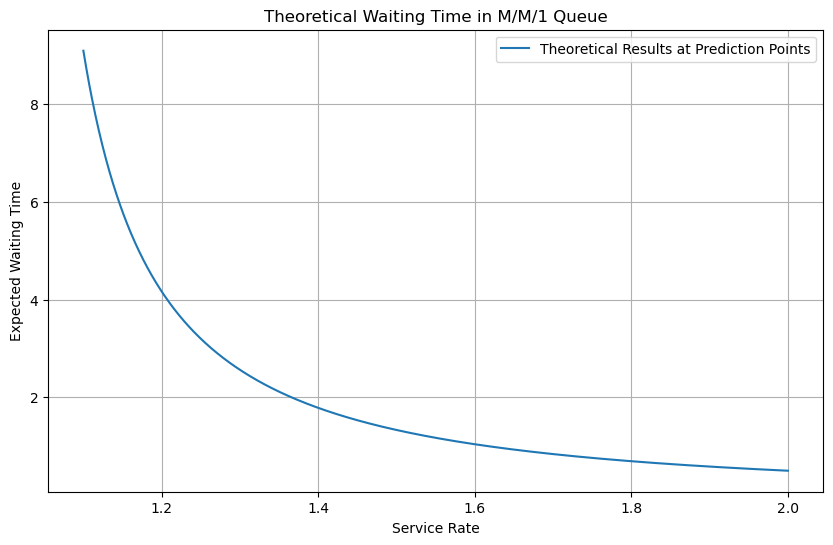

In [23]:
import matplotlib.pyplot as plt

# Plotting the theoretical results
plt.figure(figsize=(10, 6))
# plt.plot(X, truek, label='Theoretical Results at Design Points')
plt.plot(XK, true, label='Theoretical Results at Prediction Points')
plt.xlabel('Service Rate')
plt.ylabel('Expected Waiting Time')
plt.title('Theoretical Waiting Time in M/M/1 Queue')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
from sk_prototype.skmodel import StochasticKriging

# Initialize and train the Stochastic Kriging model
sk_model = StochasticKriging()
sk_model.train(X.reshape(-1, 1), Y, Vhat)

# Make predictions at XK points
predicted_means, predicted_stdvs = sk_model.predict(XK)

# Plotting
plt.figure(figsize=(12, 6))

# Plot theoretical results
plt.plot(XK, true, label='Theoretical Results at Prediction Points', color='blue')

# Plot Stochastic Kriging predictions
plt.plot(XK, predicted_means, label='Stochastic Kriging Predictions', color='red')

# Optionally, you can also include error bars to show prediction uncertainty
plt.errorbar(XK, predicted_means, yerr=predicted_stdvs, fmt='o', color='red', alpha=0.5)

plt.xlabel('Service Rate')
plt.ylabel('Expected Waiting Time')
plt.title('Comparison of Theoretical Waiting Time and Stochastic Kriging Predictions in M/M/1 Queue')
plt.legend()
plt.grid(True)
plt.show()


ValueError: operands could not be broadcast together with shapes (10,) (1000,) 

$$ \tilde{Y} = Y - B \beta$$

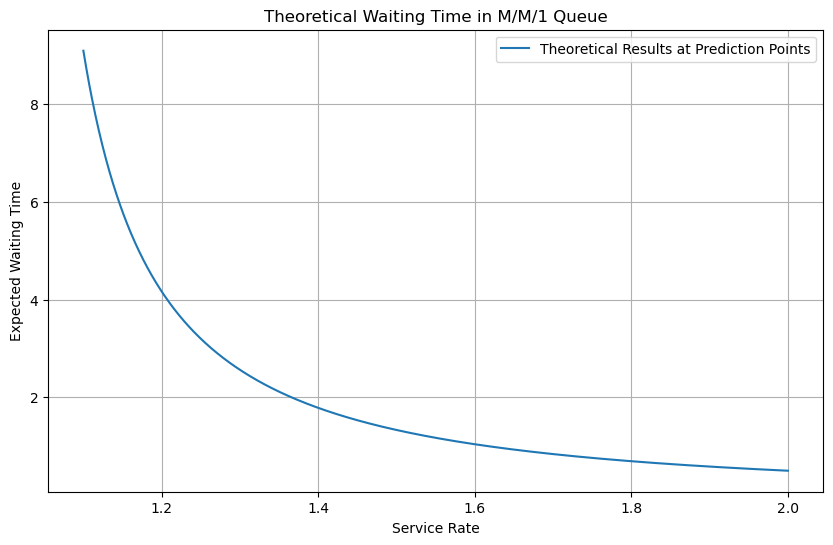

In [19]:
import matplotlib.pyplot as plt

# Plotting the theoretical results
plt.figure(figsize=(10, 6))
# plt.plot(X, truek, label='Theoretical Results at Design Points')
plt.plot(XK, true, label='Theoretical Results at Prediction Points')
plt.xlabel('Service Rate')
plt.ylabel('Expected Waiting Time')
plt.title('Theoretical Waiting Time in M/M/1 Queue')
plt.legend()
plt.grid(True)
plt.show()
